**CSI 4506 Introduction à l'intelligence artificielle** <br/>
*Devoir 2: apprentissage automatique*

# Identification

Nom: Youssef Chouay <br/>
Numéro d'étudiant : 300162426

Nom: Tawfiq Abubaker <br/>
Numéro d'étudiant : 300203154


# Exploration des données

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Charger le jeu de données et fournir un résumé de sa structure :

#### **Décrivez les attributs (colonnes), leurs types de données et la variable cible.**

In [172]:
dataset = pd.read_csv("https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a2/diabetes_prediction_dataset.csv")
print(dataset.dtypes)
print(dataset.head())


gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155     

On remarque que le jeu de données contient 9 colonnes, dont 8 sont des attributs et 1 est la variable cible. Les attributs sont majoritairement de type numérique (`age`, `bmi`, `HbA1c_level`, `blood_glucose_level`) ou binaire (`hypertension`, `heart_disease`), avec quelques variables de type catégorique (`gender`, `smoking_history`). La variable cible `diabetes` est de type binaire (0 ou 1).

### 2. Analyse de la distribution des attributs :
#### **Examinez la distribution de chaque attribut à l'aide de visualisations appropriées telles que des histogrammes et des boxplots. Discutez des informations obtenues, y compris la présence de valeurs aberrantes.**

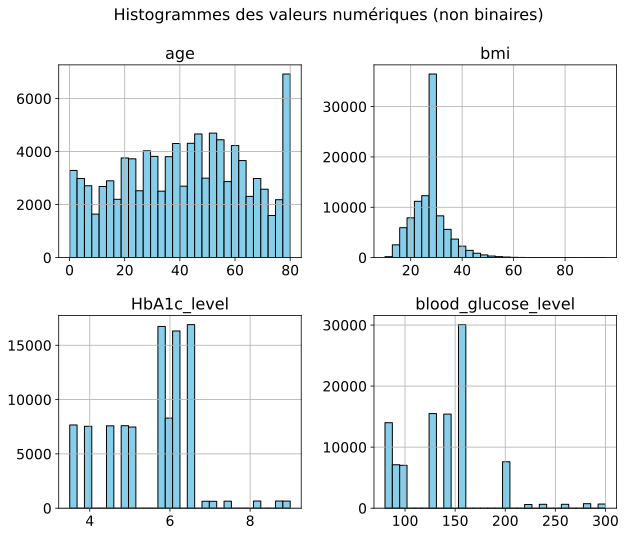

In [173]:
dataset_hist = dataset[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
dataset_hist.hist(bins=30, color='skyblue', edgecolor='black', figsize=(10, 8))
plt.suptitle('Histogrammes des valeurs numériques (non binaires)', fontsize=16)
plt.show()

<Axes: >

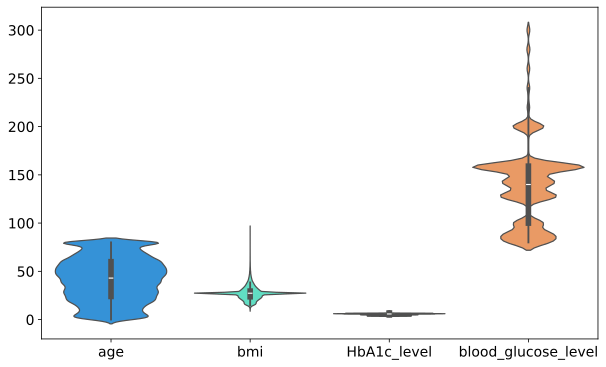

In [174]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=dataset_hist,palette='rainbow')

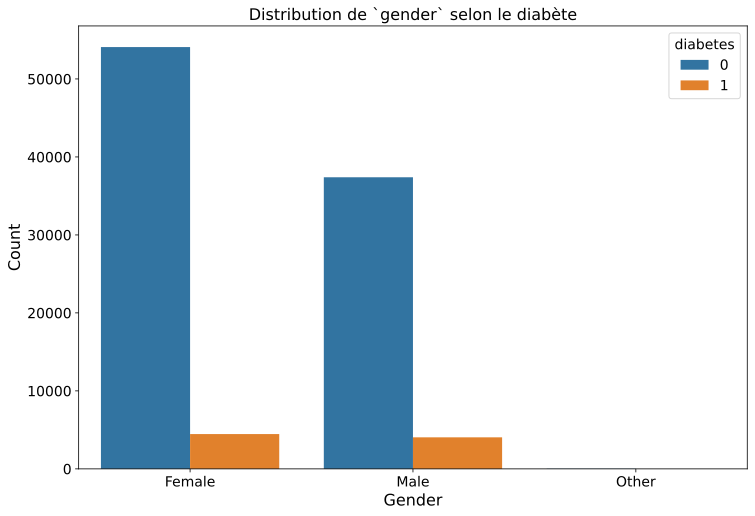

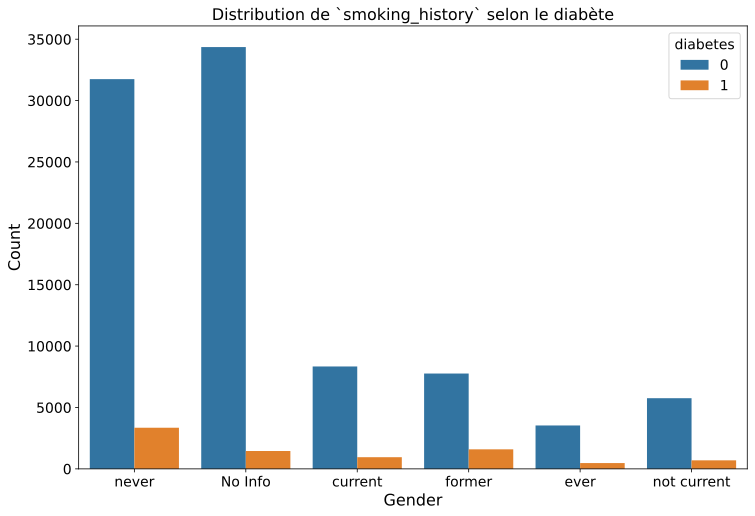

In [175]:
plt.figure(figsize=(12, 8))
sns.countplot(x='gender', hue='diabetes', data=dataset)
plt.title('Distribution de `gender` selon le diabète')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(x='smoking_history', hue='diabetes', data=dataset)
plt.title('Distribution de `smoking_history` selon le diabète')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [176]:
def detect_outliers(df):
  outliers = pd.DataFrame(columns=df.columns)
  outlier_columns = []
  for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)].copy()
    outliers_in_column['Outlier_Column'] = column
    outliers = pd.concat([outliers, outliers_in_column])
  return outliers

In [177]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
outliers = detect_outliers(dataset_hist)
# outliers = outliers.drop_duplicates()
print("Nombre de valeurs aberrantes detectées :", len(outliers))
print("Pourcentage de valeurs aberrantes par rapport au dataset :", len(outliers) / len(numeric_dataset) * 100)
outliers_by_column = outliers['Outlier_Column'].value_counts()
print("Nombre de valeurs aberrantes par colonne :")
for column, count in outliers_by_column.items():
  print(f"{column} : {count}")

Nombre de valeurs aberrantes detectées : 10439
Pourcentage de valeurs aberrantes par rapport au dataset : 10.439
Nombre de valeurs aberrantes par colonne :
bmi : 7086
blood_glucose_level : 2038
HbA1c_level : 1315


On remarque que les attributs `age` et `bmi` sont distribués de manière relativement normale, avec quelques valeurs aberrantes. Les attributs `hypertension` et `heart_disease` sont binaires, donc leur distribution est plus simple.
Les attributs `HbA1c_level` et `blood_glucose_level` sont distribués de manière plus complexe, avec des valeurs aberrantes et une distribution asymétrique. Les attributs `gender` et `smoking_history` sont catégoriques, donc leur distribution est également simple.
Les valeurs aberrantes en général sont vraiment presentes (~ 10% des données) et peuvent affecter la performance du modèle.

### 3. Distribution de la variable cible :
#### **Analysez la distribution de la variable cible pour identifier les déséquilibres de classes. Utilisez des diagrammes en barres pour visualiser les fréquences des classes.**

diabetes
0    91500
1     8500
Name: count, dtype: int64


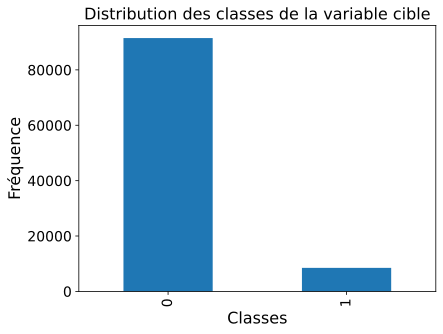

In [178]:
distribution = dataset['diabetes'].value_counts()
print(distribution)
distribution.plot(kind='bar')
plt.title('Distribution des classes de la variable cible')
plt.xlabel('Classes')
plt.ylabel('Fréquence')
plt.show()

On remarque une disparité entre les classes de la variable cible `diabetes`, avec une majorité de patients non diabétiques (classe 0) par rapport aux patients diabétiques (classe 1). Ce déséquilibre de classes peut affecter la performance du modèle, comme aussi, il pourrait refleter un biais dans les données qui provient de la vraie distribution des patients diabétiques dans la population.

### 4. Fractionnement des données :
#### **Divisez le jeu de données en ensembles d'entraînement (80 %) et de test (20 %) en utilisant la méthode du holdout.**
Assurez-vous que ce fractionnement intervient avant tout prétraitement afin d'éviter les fuites de données.

In [179]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)
print(f"Training set size: {len(train_set)}")
print(f"Testing set size: {len(test_set)}")

Training set size: 80000
Testing set size: 20000


# Prétraitement des données

### 5. Encodage des variables catégoriques :
#### **Encodez les variables catégoriques. Justifiez la méthode choisie.**

In [180]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
# Encodage pour le jeu d'entraînement
train_set['gender'] = label_encoder.fit_transform(train_set['gender'])
# Encodage pour le jeu de test
test_set['gender'] = label_encoder.transform(test_set['gender'])
# --------------------
onehot_encoder = OneHotEncoder(sparse_output=False)
# Encodage pour le jeu d'entraînement
smoking_history_encoded = onehot_encoder.fit_transform(train_set[['smoking_history']])
smoking_history_encoded_df = pd.DataFrame(smoking_history_encoded, columns=onehot_encoder.get_feature_names_out(['smoking_history']))
train_set = pd.concat([train_set.reset_index(drop=True), smoking_history_encoded_df.reset_index(drop=True)], axis=1)
train_set.drop('smoking_history', axis=1, inplace=True)
# Encodage pour le jeu de test
smoking_history_encoded = onehot_encoder.transform(test_set[['smoking_history']])
smoking_history_encoded_df = pd.DataFrame(smoking_history_encoded, columns=onehot_encoder.get_feature_names_out(['smoking_history']))
test_set = pd.concat([test_set.reset_index(drop=True), smoking_history_encoded_df.reset_index(drop=True)], axis=1)
test_set.drop('smoking_history', axis=1, inplace=True)


Pour l'encodage des variables categoriques, j'ai choisi d'utiliser l'encodage one-hot pour la variable `smoking_history`, car il est plus adapté pour les variables catégoriques avec plus de deux catégories. Cela permet de transformer les variables catégoriques en plusieurs variables binaires, ce qui facilite l'entrainement du modèle. Quant à la variable `gender`, j'ai choisi d'utiliser un encodage binaire (0 ou 1) car elle contient seulement deux catégories.

### 6. Normalisation/Standardisation des attributs numériques :
#### **Normalisez ou standardisez les attributs numériques si nécessaire. Décrivez la technique utilisée (par exemple, le scaling Min-Max, StandardScaler) et expliquez pourquoi elle est appropriée pour ce jeu de données.**
Assurez-vous que cette technique est appliquée uniquement aux données d'entraînement, avec la même transformation appliquée ensuite aux données de test sans nouvel ajustement.

In [181]:
# Linear scaling for `age`
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_set['age'] = scaler.fit_transform(train_set[['age']])
test_set['age'] = scaler.transform(test_set[['age']])
# Standard scaling for `bmi`
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_set['bmi'] = scaler.fit_transform(train_set[['bmi']])
test_set['bmi'] = scaler.transform(test_set[['bmi']])
# Standard scaling for `HbA1c_level`
scaler = StandardScaler()
train_set['HbA1c_level'] = scaler.fit_transform(train_set[['HbA1c_level']])
test_set['HbA1c_level'] = scaler.transform(test_set[['HbA1c_level']])
# Robust scaling for `blood_glucose_level`
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
train_set['blood_glucose_level'] = scaler.fit_transform(train_set[['blood_glucose_level']])
test_set['blood_glucose_level'] = scaler.transform(test_set[['blood_glucose_level']])

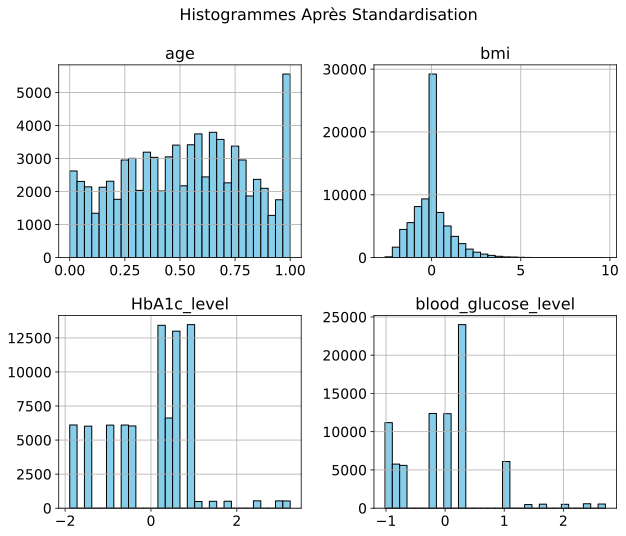

In [182]:
train_set_hist = train_set[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
train_set_hist.hist(bins=30, color='skyblue', edgecolor='black', figsize=(10, 8))
plt.suptitle('Histogrammes Après Standardisation', fontsize=16)
plt.show()

Pour normaliser les attributs numériques, j'ai utilisé le scaling Min-Max pour la variable `age`, cette technique est appropriée pour cette variable car elle est plutôt distribuée de manière équivalente. Pour les variables `bmi` et `HbA1c_level`, j'ai utilisé le StandardScaler, car ces variables sont distribuées de manière plus normale. Pour la variable `blood_glucose_level`, j'ai utilisé le RobustScaler, car elle contient plus de valeurs aberrantes.

# Développement et évaluation des modèles

### 7. Développement des modèles :
#### **Implémentez les modèles d'apprentissage automatique abordés en classe : arbres de décision, K-Nearest Neighbors (KNN) et régression logistique. Utilisez les paramètres par défaut de scikit-learn comme base pour entraîner chaque modèle.**

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Séparation des variables explicatives et de la variable cible
X_train = train_set.drop('diabetes', axis=1)
y_train = train_set['diabetes']
X_test = test_set.drop('diabetes', axis=1)
y_test = test_set['diabetes']

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)

### 8. Évaluation des modèles :
#### **Utilisez la validation croisée pour évaluer chaque modèle, en justifiant votre choix du nombre de plis.**
#### **Évaluez les modèles à l'aide de métriques telles que la précision, le rappel et le score F1.**

In [184]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
models = [dt_model, knn_model, lr_model]
model_names = ['Arbre de Décision', 'K-Nearest Neighbors', 'Régression Logistique']
for model in models:
  y_pred = cross_val_predict(model, X_train, y_train, cv=5)
  accuracy = accuracy_score(y_train, y_pred)
  precision = precision_score(y_train, y_pred)
  recall = recall_score(y_train, y_pred)
  f1 = f1_score(y_train, y_pred)
  print(f"Model: {model_names[models.index(model)]}")
  print(f"├── Métriques:")
  print(f"│   ├── Précision: {accuracy}")
  print(f"│   ├── Exactitude: {precision}")
  print(f"│   ├── Rappel: {recall}")
  print(f"│   └── F1 Score: {f1}")

Model: Arbre de Décision
├── Métriques:
│   ├── Précision: 0.9508375
│   ├── Exactitude: 0.7010265785402897
│   ├── Rappel: 0.7339517078916372
│   └── F1 Score: 0.7171114148025606
Model: K-Nearest Neighbors
├── Métriques:
│   ├── Précision: 0.96225
│   ├── Exactitude: 0.903681506849315
│   ├── Rappel: 0.6216136631330977
│   └── F1 Score: 0.7365666434054431
Model: Régression Logistique
├── Métriques:
│   ├── Précision: 0.960625
│   ├── Exactitude: 0.8699715562779358
│   ├── Rappel: 0.6304475853945819
│   └── F1 Score: 0.7310910022195664


# Optimisation des hyperparamètres

### 9. Exploration et évaluation des performances :
#### **Étudiez l'impact de la variation des valeurs des hyperparamètres sur les performances de chaque modèle.**
* Concentrez-vous sur les hyperparamètres pertinents suivants pour chaque modèle :
  * [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html) : `criterion` et `max_depth`.
  * [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) : `penalty`, `max_iter`, et `tol`.
  * [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) : `n_neighbors` et `weights`.
* Employez une stratégie de recherche en grille ou utilisez les méthodes intégrées de scikit-learn pour évaluer exhaustivement toutes les combinaisons des valeurs d'hyperparamètres. La validation croisée doit être utilisée pour évaluer chaque combinaison.
* Quantifiez les performances de chaque configuration d'hyperparamètres en utilisant des métriques telles que la précision, le rappel et le score F1.
* Affichez les résultats dans un format tabulaire ou graphique (par exemple, graphiques en ligne, diagrammes en barres) pour démontrer efficacement l'influence des variations des hyperparamètres sur les performances du modèle.
* Spécifiez les valeurs par défaut de chaque hyperparamètre testé.
* Analysez les résultats et offrez des perspectives sur les configurations d'hyperparamètres ayant obtenu les meilleures performances pour chaque modèle.

In [185]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
# Modèles
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(),
    'KNeighbors': KNeighborsClassifier()
}
# Hyperparamètres à tester
param_grid = {
    'DecisionTree': {
        'criterion': ['gini', 'entropy'],  # Par défaut: gini
        'max_depth': [None, 10, 20, 30]    # Par défaut: None
    },
    'LogisticRegression': {
        'penalty': ['l2', None],         # Par défaut: l2
        'max_iter': [100, 200],            # Par défaut: 100
        'tol': [1e-4, 1e-3, 1e-2]          # Par défaut: 1e-4
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 7],          # Par défaut: 5
        'weights': ['uniform', 'distance'] # Par défaut: uniform
    }
}
# Définir les métriques de performance
scoring = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

In [186]:
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
default_params = {
    'DecisionTree': {
        'criterion': 'gini',  
        'max_depth': None     
    },
    'LogisticRegression': {
        'penalty': 'l2',      
        'max_iter': 100,      
        'tol': 1e-4          
    },
    'KNeighbors': {
        'n_neighbors': 5,     
        'weights': 'uniform'  
    }
}

def display_performance(grid_search, model_name):
    # 1. Convert grid search results into a DataFrame
    results_df = pd.DataFrame(grid_search.cv_results_)

    # 2. Find the row corresponding to the default parameters
    default_params_row = results_df[
        results_df['params'] == default_params[model_name]
    ].index[0]

    # 3. Extract the performance of the default parameters
    baseline_score = results_df.loc[default_params_row, 'mean_test_precision']

    # 4. Create a line plot for mean precision across different parameter settings
    plt.figure(figsize=(12, 6))
    
    if 'mean_test_precision' in results_df.columns:
        sns.lineplot(data=results_df, x=results_df.index, y='mean_test_precision', marker='o', label='Précision Médianne')
        
        for idx, row in results_df.iterrows():
            param_string = ', '.join([f"{param}={row[param]}" for param in results_df.columns if param.startswith('param_')])
            # plt.text(idx, row['mean_test_precision'], param_string, fontsize=8, ha='center', va='center', rotation=45)
            plt.annotate(param_string, (idx, row['mean_test_precision']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, va='center', rotation=45)

        plt.axhline(baseline_score, color='red', linestyle='--', linewidth=2, label=f'Référence: Paramètres par défault (Précision: {baseline_score:.2f})')

        plt.title(f'Précision à travers différents paramètres pour {model_name}', fontsize=16, fontweight='bold')
        plt.xlabel('Itération', fontsize=14)
        plt.ylabel('Précision Médianne', fontsize=14)
        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)
        plt.minorticks_on()
        plt.grid(True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)
        plt.grid(True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1.5)
        # Background color 
        plt.gca().set_facecolor('#FEFFF4')

        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

        plt.legend(fontsize=12)
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"Pas de moyenne pour {model_name}.")

    # 5. Create a boxplot for F1 score distribution across splits
    score_columns = [col for col in results_df.columns if 'split' in col and 'test_f1' in col]
    
    if score_columns:
        results_melted = results_df.melt(value_vars=score_columns, var_name='Split', value_name='F1 Score')
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Split', y='F1 Score', data=results_melted)

        plt.title(f'F1 Score de la Distribution de la Validation-Croisée pour {model_name}', fontsize=16, fontweight='bold')
        plt.xlabel('CV Plis', fontsize=14)
        plt.ylabel('F1 Score', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

        plt.tight_layout()
        plt.show()
    else:
        print(f"Pas de validation croisée pour {model_name}.")

In [187]:
from tabulate import tabulate
from sklearn.metrics import precision_score, recall_score, f1_score

def display_results(grid_search, model_name):
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"\nMeilleur hyperparamèters pour {model_name}: {best_params}")
    print(f"Meilleur F1 score: {best_score:.4f}\n")
    y_pred = cross_val_predict(grid_search.best_estimator_, X_train, y_train, cv=5)
    macro_precision = precision_score(y_train, y_pred, average='macro')
    macro_recall = recall_score(y_train, y_pred, average='macro')
    macro_f1 = f1_score(y_train, y_pred, average='macro')
    micro_precision = precision_score(y_train, y_pred, average='micro')
    micro_recall = recall_score(y_train, y_pred, average='micro')
    micro_f1 = f1_score(y_train, y_pred, average='micro')
    comparison_df = pd.DataFrame({
      'Métrique': ['Précision', 'Rappel', 'F1 Score'],
      'Moyenne Macro': [macro_precision, macro_recall, macro_f1],
      'Moyenne Micro': [micro_precision, micro_recall, micro_f1]
    })
    print(tabulate(comparison_df, headers='keys', tablefmt='fancy_grid', showindex=False))

    results_df = pd.DataFrame(grid_search.cv_results_)
    selected_columns = results_df[['params', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']]
    print(tabulate(selected_columns, headers='keys', tablefmt='fancy_grid', showindex=False))



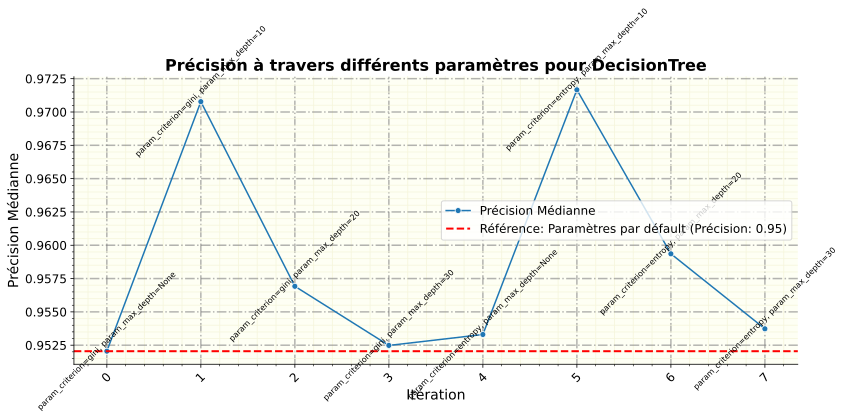

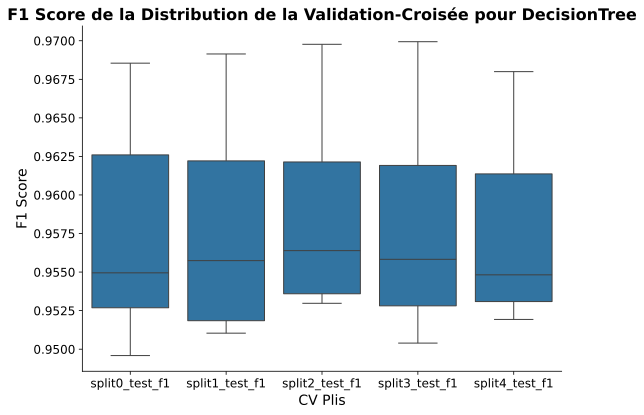


Meilleur hyperparamèters pour DecisionTree: {'criterion': 'entropy', 'max_depth': 10}
Meilleur F1 score: 0.9691

╒════════════╤═════════════════╤═════════════════╕
│ Métrique   │   Moyenne Macro │   Moyenne Micro │
╞════════════╪═════════════════╪═════════════════╡
│ Précision  │        0.974686 │         0.97145 │
├────────────┼─────────────────┼─────────────────┤
│ Rappel     │        0.838673 │         0.97145 │
├────────────┼─────────────────┼─────────────────┤
│ F1 Score   │        0.89304  │         0.97145 │
╘════════════╧═════════════════╧═════════════════╛
╒═════════════════════════════════════════════╤═══════════════════════╤════════════════════╤════════════════╕
│ params                                      │   mean_test_precision │   mean_test_recall │   mean_test_f1 │
╞═════════════════════════════════════════════╪═══════════════════════╪════════════════════╪════════════════╡
│ {'criterion': 'gini', 'max_depth': None}    │              0.952051 │           0.950875 │     

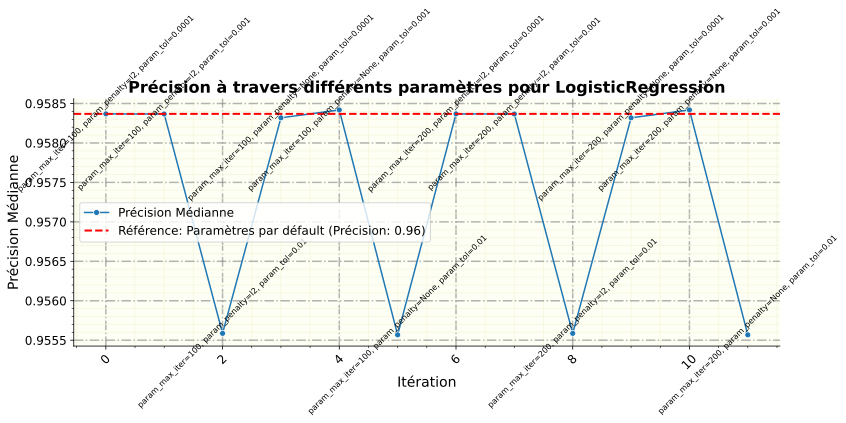

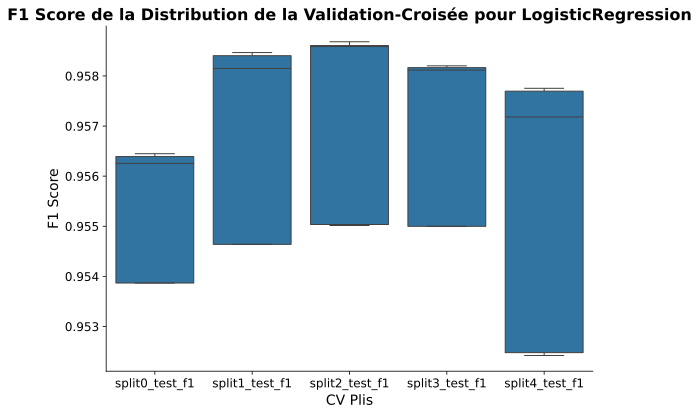


Meilleur hyperparamèters pour LogisticRegression: {'max_iter': 100, 'penalty': None, 'tol': 0.001}
Meilleur F1 score: 0.9579

╒════════════╤═════════════════╤═════════════════╕
│ Métrique   │   Moyenne Macro │   Moyenne Micro │
╞════════════╪═════════════════╪═════════════════╡
│ Précision  │        0.917273 │        0.960688 │
├────────────┼─────────────────┼─────────────────┤
│ Rappel     │        0.812289 │        0.960688 │
├────────────┼─────────────────┼─────────────────┤
│ F1 Score   │        0.855574 │        0.960688 │
╘════════════╧═════════════════╧═════════════════╛
╒═══════════════════════════════════════════════════╤═══════════════════════╤════════════════════╤════════════════╕
│ params                                            │   mean_test_precision │   mean_test_recall │   mean_test_f1 │
╞═══════════════════════════════════════════════════╪═══════════════════════╪════════════════════╪════════════════╡
│ {'max_iter': 100, 'penalty': 'l2', 'tol': 0.0001} │             

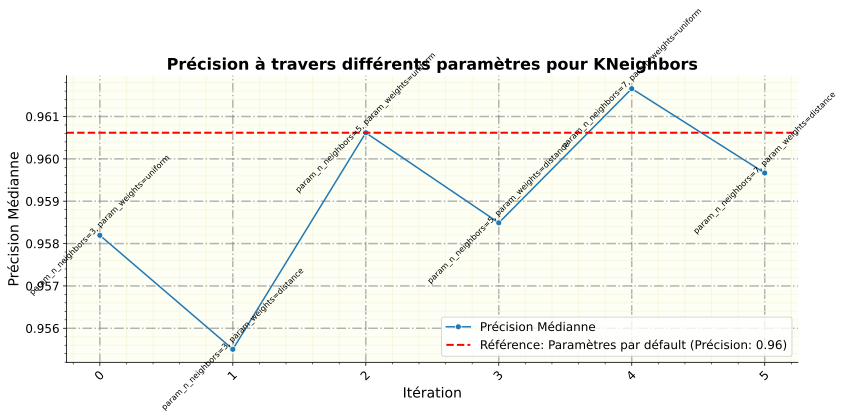

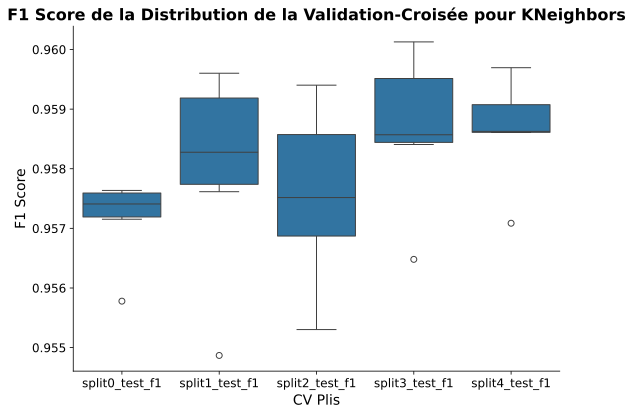


Meilleur hyperparamèters pour KNeighbors: {'n_neighbors': 5, 'weights': 'uniform'}
Meilleur F1 score: 0.9590

╒════════════╤═════════════════╤═════════════════╕
│ Métrique   │   Moyenne Macro │   Moyenne Micro │
╞════════════╪═════════════════╪═════════════════╡
│ Précision  │        0.934782 │         0.96225 │
├────────────┼─────────────────┼─────────────────┤
│ Rappel     │        0.807733 │         0.96225 │
├────────────┼─────────────────┼─────────────────┤
│ F1 Score   │        0.858117 │         0.96225 │
╘════════════╧═════════════════╧═════════════════╛
╒═══════════════════════════════════════════╤═══════════════════════╤════════════════════╤════════════════╕
│ params                                    │   mean_test_precision │   mean_test_recall │   mean_test_f1 │
╞═══════════════════════════════════════════╪═══════════════════════╪════════════════════╪════════════════╡
│ {'n_neighbors': 3, 'weights': 'uniform'}  │              0.958195 │           0.960538 │       0.957946 

In [188]:
grid_searches = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], scoring=scoring, refit='f1', cv=5)
    grid_search.fit(X_train, y_train)
    grid_searches[model_name] = grid_search
    display_performance(grid_search, model_name)
    display_results(grid_search, model_name)


# Analyse des résultats

### 10. Comparaison des modèles :
#### **Comparez les résultats obtenus pour chaque modèle.**

In [189]:
def plot_model_performance(grid_searches):
    fig, ax = plt.subplots(figsize=(12, 6)) 
    colors = ["#2B2F42", "#8D99AE", "#EF233C"]
    labels = ['DecisionTree', 'LogisticRegression', 'KNeighbors']

    all_f1_scores = []

    for i, model_name in enumerate(labels):
        results_df = pd.DataFrame(grid_searches[model_name].cv_results_)

        f1_scores = results_df['mean_test_f1']
        all_f1_scores.append(f1_scores)

        ax.plot(range(len(f1_scores)), f1_scores, label=model_name, color=colors[i], linewidth=2)
        ax.text(
            len(f1_scores) - 1, f1_scores.iloc[-1], model_name, color=colors[i], fontweight="bold", verticalalignment="center", horizontalalignment="left",
        )

        max_index = f1_scores.idxmax()
        max_f1_score = f1_scores[max_index]
        max_params = results_df['params'].iloc[max_index]

        # Annotate the point of the maximum F1 score
        ax.annotate(f"Max: {max_f1_score:.2f}\n{max_params}",
                    xy=(max_index, max_f1_score), 
                    xytext=(max_index, max_f1_score + 0.02 * i),
                    arrowprops=dict(facecolor=colors[i], shrink=0.05),
                    fontsize=10, color=colors[i])

    # Calculate the baseline: the average F1 score across all models
    flattened_f1_scores = [score for f1_list in all_f1_scores for score in f1_list]
    baseline = sum(flattened_f1_scores) / len(flattened_f1_scores) 

    # Plot the baseline (average F1 score)
    ax.plot(
        [0, max(len(pd.DataFrame(grid_searches[model].cv_results_)) for model in labels) - 1],  
        [baseline, baseline], 
        label="Average Baseline",
        color="lightgray",
        linestyle="--",
        linewidth=1,
    )

    # Plot the baseline text
    ax.text(
        max(len(pd.DataFrame(grid_searches[model].cv_results_)) for model in labels) - 1, baseline,
        f"Moyenne des modèles : {baseline:.2f}", color="lightgray", fontweight="bold", horizontalalignment="left", verticalalignment="center",
    )

    ax.set_ylim(0.95, 1.0)

    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)

    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")
    ax.spines["bottom"].set_bounds(0, max(len(pd.DataFrame(grid_searches[model].cv_results_)) for model in labels) - 1)
    ax.set_xlabel("Itération de la recherche")
    ax.set_ylabel("F1 Score")
    plt.tight_layout()
    plt.savefig("model_performance.png", dpi=300)
    plt.show()


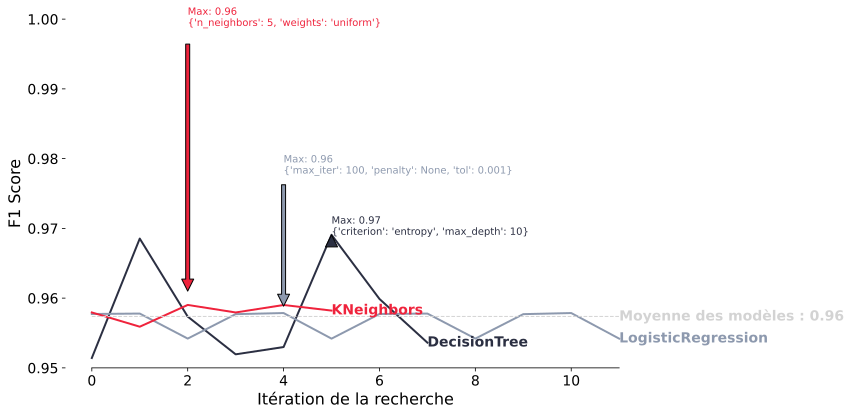

In [190]:
plot_model_performance(grid_searches)

#### **Discutez des différences observées dans les performances des modèles et fournissez des explications potentielles. Considérez des aspects tels que la complexité des modèles, le déséquilibre des données, le surapprentissage et l'impact du réglage des paramètres sur les résultats globaux.**
* Fournissez des recommandations sur le(s) modèle(s) à choisir pour cette tâche et justifiez vos choix en fonction des résultats de l'analyse.

Tout les modèles ont eu des performances relativement bonnes, les variations sont au 0.001 près, mais on remarque que le modèle arbre de décision a obtenu les meilleures résultats en général. Cela est peut être dû à la nature de la tâche, qui est de prédire une variable binaire, et l'arbre de décision est un modèle simple et efficace pour ce type de tâche. Cependant, il est important de noter que le déséquilibre des classes dans les données a aussi affecté la performance des modèles, en prenant en compte ces aspects, le modèle arbre de décision prends un avantage considérable par rapport aux autres modèles (le F1 score des deux autres modèles est aux alentours de 85% où celui de l'arbre de décision est à ~89%).
Lors de l'analyse, on remarque aussi que l'optimisation des hyperparamètres a amélioré significativement les performances des modèles, en particulier pour l'arbre de décision, cela est peut-être dû à la nature du modèle, qui peut être plus sensible aux hyperparamètres. Malgré tout, il est important de noter que les performances des autres modèles ce sont aussi améliorées, nous donnant des résultats competitifs.
Mais pour notre tâche, en prenant en compte le déséquilibre des classes et l'optimisation des hyperparamètres, le modèle arbre de décision est le plus recommandé (avec ces hyperparamètres: `{'criterion': 'entropy', 'max_depth': 10}`).

#### **Entraînez le(s) modèle(s) recommandé(s) en utilisant les valeurs optimales des paramètres identifiés lors de l'optimisation des paramètres. Appliquez ensuite le modèle entraîné aux données de test. Documentez vos observations de manière détaillée. Évaluez spécifiquement si les résultats dérivés de la validation croisée sont cohérents avec ceux obtenus sur le jeu de test.**

In [191]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
  # Cross-Validation Metrics
  y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5)
  cv_accuracy = accuracy_score(y_train, y_pred_cv)
  cv_precision = precision_score(y_train, y_pred_cv)
  cv_recall = recall_score(y_train, y_pred_cv)
  cv_f1 = f1_score(y_train, y_pred_cv)

  # Hold-Out Testing Metrics
  model.fit(X_train, y_train)
  y_pred_test = model.predict(X_test)
  test_accuracy = accuracy_score(y_test, y_pred_test)
  test_precision = precision_score(y_test, y_pred_test)
  test_recall = recall_score(y_test, y_pred_test)
  test_f1 = f1_score(y_test, y_pred_test)

  # Create a DataFrame to compare metrics
  metrics_comparison = pd.DataFrame({
    'Métrique': ['Précision', 'Exactitude', 'Rappel', 'F1 Score'],
    'Validation Croisée': [cv_accuracy, cv_precision, cv_recall, cv_f1],
    'Hold-Out': [test_accuracy, test_precision, test_recall, test_f1]
  })
  print(f"Modèle : {model.__class__.__name__}")
  print(tabulate(metrics_comparison, headers='keys', tablefmt='fancy_grid', showindex=False))

  metrics = ['Précision', 'Exactitude', 'Rappel', 'F1 Score']
  cross_val_scores = metrics_comparison['Validation Croisée']
  hold_out_scores = metrics_comparison['Hold-Out']
  x = range(len(metrics))
  plt.figure(figsize=(10, 6))
  plt.bar(x, cross_val_scores, width=0.4, label='Validation Croisée', align='center')
  plt.bar(x, hold_out_scores, width=0.4, label='Hold-Out', align='edge')
  plt.xlabel('Métrique')
  plt.ylabel('Scores')
  plt.title(f'Comparaison des métriques de performances pour le modèle : {model.__class__.__name__}')
  plt.xticks(x, metrics)
  plt.legend()
  plt.show()

Modèle : DecisionTreeClassifier
╒════════════╤══════════════════════╤════════════╕
│ Métrique   │   Validation Croisée │   Hold-Out │
╞════════════╪══════════════════════╪════════════╡
│ Précision  │             0.97145  │   0.972    │
├────────────┼──────────────────────┼────────────┤
│ Exactitude │             0.978353 │   0.985618 │
├────────────┼──────────────────────┼────────────┤
│ Rappel     │             0.67874  │   0.682084 │
├────────────┼──────────────────────┼────────────┤
│ F1 Score   │             0.80146  │   0.806228 │
╘════════════╧══════════════════════╧════════════╛


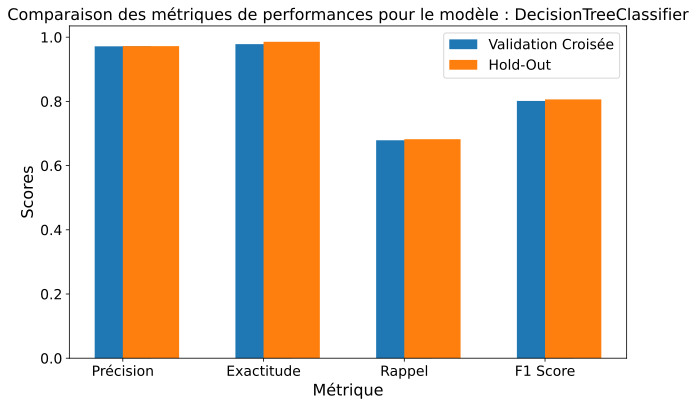

In [192]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=10)
evaluate_model(model, X_train, y_train, X_test, y_test)

Après entrainement du modèle arbre de décision avec les hyperparamètres optimisés, on obtient des résultats très similaires à ceux obtenus lors de la validation croisée, ce qui est un bon signe. Cela indique que le modèle généralise bien sur les nouvelles données, et que les hyperparamètres choisis sont bien adaptés pour cette tâche. Le modèle est donc bien ajusté et est prêt à être utilisé.
Pour s'assurer de notre choix, on peut aussi comparer les performances du modèle arbre de décision avec les autres modèles sur les données de test, pour voir si le modèle est effectivement le meilleur choix pour cette tâche.

Modèle : KNeighborsClassifier
╒════════════╤══════════════════════╤════════════╕
│ Métrique   │   Validation Croisée │   Hold-Out │
╞════════════╪══════════════════════╪════════════╡
│ Précision  │             0.961475 │   0.9621   │
├────────────┼──────────────────────┼────────────┤
│ Exactitude │             0.895691 │   0.899832 │
├────────────┼──────────────────────┼────────────┤
│ Rappel     │             0.618227 │   0.625878 │
├────────────┼──────────────────────┼────────────┤
│ F1 Score   │             0.731533 │   0.73826  │
╘════════════╧══════════════════════╧════════════╛


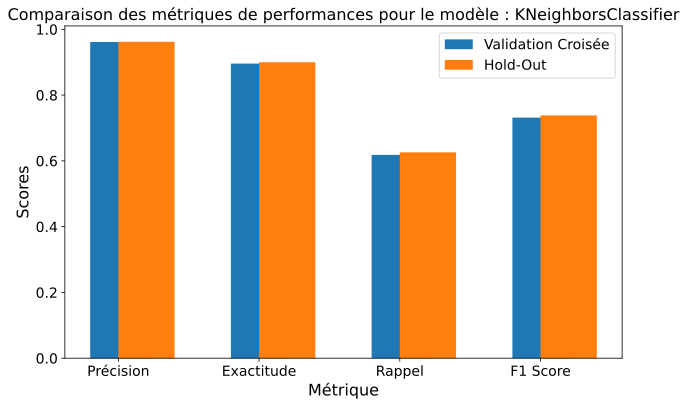

Modèle : LogisticRegression
╒════════════╤══════════════════════╤════════════╕
│ Métrique   │   Validation Croisée │   Hold-Out │
╞════════════╪══════════════════════╪════════════╡
│ Précision  │             0.960625 │   0.959    │
├────────────┼──────────────────────┼────────────┤
│ Exactitude │             0.869972 │   0.863934 │
├────────────┼──────────────────────┼────────────┤
│ Rappel     │             0.630448 │   0.617096 │
├────────────┼──────────────────────┼────────────┤
│ F1 Score   │             0.731091 │   0.719945 │
╘════════════╧══════════════════════╧════════════╛


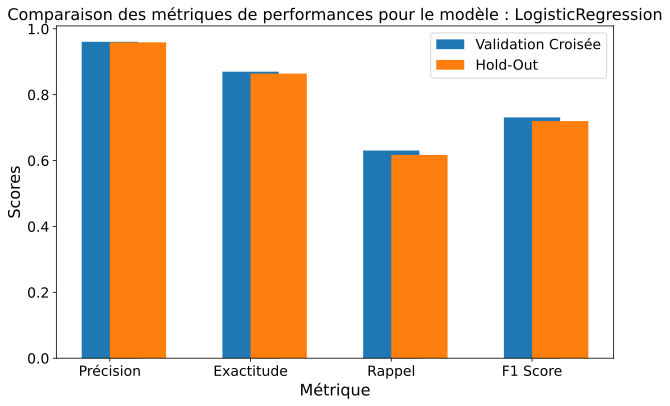

In [193]:
models = [KNeighborsClassifier(n_neighbors=7, weights='distance'), LogisticRegression(max_iter=100, penalty='l2', tol=0.0001)]
for model in models:
  evaluate_model(model, X_train, y_train, X_test, y_test)

**Après vérification, notre choix était bel et bien le plus optimal pour notre tâche.**

# Ressources & Références
1. [Making Plots in Jupyter Notebook Beautiful & More Meaningful](https://towardsdatascience.com/making-plots-in-jupyter-notebook-beautiful-more-meaningful-23c8a35c0d5d)
2. [Improving Matplotlib Notebook Inline Rendering](https://blakeaw.github.io/2020-05-25-improve-matplotlib-notebook-inline-res/)
3. [Making Plots Pretty - Practical Data Science](https://www.practicaldatascience.org/notebooks/class_5/week_5/46_making_plots_pretty.html)
4. [Understanding GridSearchCV](https://www.mygreatlearning.com/blog/gridsearchcv/)
5. [Google's Machine Learning Crash Course: Numerical Data and Normalization](https://developers.google.com/machine-learning/crash-course/numerical-data/normalization)
6. [Categorical Encoding Methods in Python](https://pbpython.com/categorical-encoding.html)